# Q11 (Part 2)

In [1]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
#original graph
edgelistFile<-read.table("new_edge.txt")
g=graph.data.frame(edgelistFile, directed=F)
g = set_edge_attr(g, 'weight', index = E(g), E(g)$V3)

In [3]:
edgelistFile<-read.table("triangulated_edge_list.txt")
g_del=graph.data.frame(edgelistFile, directed=F)
#g_del = set_edge_attr(g, 'weight', index = E(g), E(g)$V3)
mean_location_df <- read.delim('mean_location_coords_new.txt',header = F,encoding='UTF-8', sep = '\t')

In [4]:
mean_location_df = data.frame(mean_location_df$V2,mean_location_df$V3)

In [5]:
mean_location_df = as.matrix(mean_location_df)

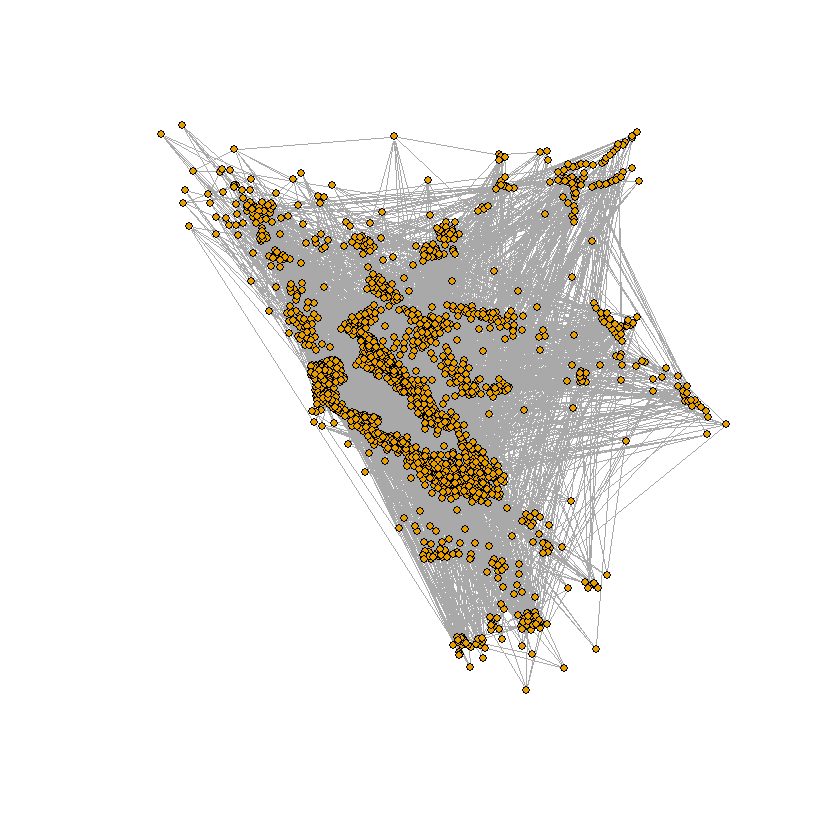

In [6]:
plot(g_del,vertex.size = 3, vertex.label = NA, layout = mean_location_df)

In [ ]:
#Executed in Rstudio, jupyter was bad here
g_del_edges = E(g_del)
edge_weight_times = c()
edge_distance_euclid = c()

for(i in 1:ecount(g_del))
{
  edge = g_del_edges[i]
  s_d = ends(g_del,edge)
  s = s_d[1]
  d = s_d[2]
  time<-distances(g, which(V(g)$name == s), which(V(g)$name==d))
  edge_weight_times = c(edge_weight_times,time[1])
  coordX1 = mean_location_df$V2[which(mean_location_df$V1 == s)]
  coordY1 = mean_location_df$V3[which(mean_location_df$V1 == s)]
  coordX2 = mean_location_df$V2[which(mean_location_df$V1 == d)]
  coordY2 = mean_location_df$V3[which(mean_location_df$V1 == d)]
  dist = sqrt((coordY2-coordY1)^2 + (coordX2-coordX1)^2)
  edge_distance_euclid = c(edge_distance_euclid,dist)
  cat('From node', s, 'to node',d,'\n')
}
E(g_del)$weights = edge_weight_times
E(g_del)$distances = edge_distance_euclid

flow_rate = c()
for(i in 1:ecount(g_del))
{
  dist = edge_distance_euclid[i] * 69
  cspeed = dist / edge_weight_times[i]
  frate = (60*60*4)/(2 + (0.003/cspeed))
  flow_rate = c(flow_rate,frate)
  cat('Edge number:', i,'\n')
}
E(g_del)$flows = flow_rate
edge_disjoint_paths(g_del, source=stanfordID, target=ucscID)

In [42]:
edge_weight_times

[1] 170.875

In [ ]:
saveRDS(g_del,file = 'g_del.rds')
#node id for stanford = 2607
#node id for ucsc = 1968
stanfordID = which(V(g_del)$name == '2607')
ucscID = which(V(g_del)$name == '1968')
max_flow(g_del, stanfordID, ucscID, flow_rate)$value


mean_times = mean(edge_weight_times)
std_times = sd(edge_weight_times)
threshold_upper = mean_times +  std_times

g_del_thresh <- delete_edges(g_del, which(E(g_del)$weights > threshold_upper))
